## Discussion 4: String, Group, Joining Operations

We will continue discussion of [Pandas](https://pandas.pydata.org/). In this discussion, you will learn about:

* String operations
* Groupby 
* Joining DataFrames

You will not have enough time to do all of these problems in discussion and your TA will select a subset of the problems to complete. The rest are provided for your practice.

First, we import our required modules, as well as download the babynames dataset from the United States Social Security Administration. If you are interested, you can find out more about this dataset [here](https://www.ssa.gov/oact/babynames/)!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
from pathlib import Path
%matplotlib inline

import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head(5)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


## Question 1: Value Counts

To count the number of instances of each unique value in a `Series`, we can use the `value_counts()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) as `df["col_name"].value_counts()`. 

### Question 1a

Set `num_of_names_per_year equal` to a Series which counts the number of different names for each Year in California.  Use the `babynames` DataFrame created above. The index should be the year number and the value should be the number of names for that year. For example `num_of_names_per_year.loc[2007]` should be 7,250.

*Note:* We are not computing the number of babies but instead the number of names (rows in the table) for each year.

In [6]:
num_of_names_per_year = babynames['Year'].value_counts()
num_of_names_per_year.head(5)

2007    7250
2008    7158
2009    7119
2006    7075
2010    7010
Name: Year, dtype: int64

As an experiment, see what happens if we just try to call `value_counts` on the original DataFrame.

In [7]:
babynames.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

We can also plot the results using the .plot method of the Series class.

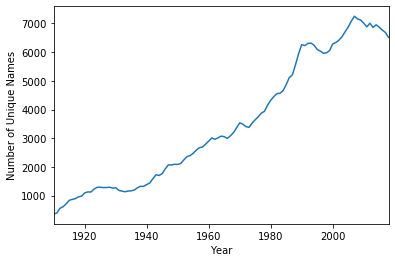

In [8]:
num_of_names_per_year.sort_index().plot()
plt.ylabel("Number of Unique Names")
plt.xlabel("Year");

### Question 1b
Count the number of different names for each sex in `CA`.

That is, set `num_of_names_per_sex` to be equal to a Series with two rows. One row corresponding to the number of different female names and one row corresponding to the number of different male names. 

In [9]:
num_of_names_per_sex =  babynames['Sex'].value_counts()
num_of_names_per_sex

F    224810
M    156404
Name: Sex, dtype: int64

## Question 2: Grouping and Filtering

Let's now turn to using groupby.

**Note:** This [slide](https://docs.google.com/presentation/d/1HfdsSHXCJkUFUmVNTXjel3yx4_WYCfcpDwGi6zcVQEM/edit#slide=id.g477ed0f02e_0_390) from a previous semester provides a visual picture of how `groupby.agg` works if you'd like a reference.

Let's start by reading in the `elections` dataset.

In [10]:
elections = pd.read_csv("elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


As a first step, we can groupby "Party" and then print out the subframes that result. This isn't something you'll do often, but just so you can see it in code, an example is given below for elections since 1980.

In [11]:
for n, g in elections.query("Year >= 1980").groupby("Party"):
    print(f"Name: {n}") # by the way this is an "f string", a relatively new and great feature of Python
    display(g)

Name: Citizens


,Year,Candidate,Party,Popular vote,Result,%
127,1980,Barry Commoner,Citizens,233052,loss,0.270182


Name: Constitution


,Year,Candidate,Party,Popular vote,Result,%
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
164,2008,Chuck Baldwin,Constitution,199750,loss,0.152398
172,2016,Darrell Castle,Constitution,203091,loss,0.149640


Name: Democratic


,Year,Candidate,Party,Popular vote,Result,%
129,1980,Jimmy Carter,Democratic,35480115,loss,41.132848
134,1984,Walter Mondale,Democratic,37577352,loss,40.729429
137,1988,Michael Dukakis,Democratic,41809074,loss,45.770691
140,1992,Bill Clinton,Democratic,44909806,win,43.118485
144,1996,Bill Clinton,Democratic,47400125,win,49.296938
151,2000,Al Gore,Democratic,50999897,loss,48.491813
158,2004,John Kerry,Democratic,59028444,loss,48.306775
162,2008,Barack Obama,Democratic,69498516,win,53.023510
168,2012,Barack Obama,Democratic,65915795,win,51.258484
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539


Name: Green


,Year,Candidate,Party,Popular vote,Result,%
149,1996,Ralph Nader,Green,685297,loss,0.712721
155,2000,Ralph Nader,Green,2882955,loss,2.741176
156,2004,David Cobb,Green,119859,loss,0.098088
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
170,2012,Jill Stein,Green,469627,loss,0.365199
177,2016,Jill Stein,Green,1457226,loss,1.073699


Name: Independent


,Year,Candidate,Party,Popular vote,Result,%
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


Name: Libertarian


,Year,Candidate,Party,Popular vote,Result,%
128,1980,Ed Clark,Libertarian,921128,loss,1.067883
132,1984,David Bergland,Libertarian,228111,loss,0.247245
138,1988,Ron Paul,Libertarian,431750,loss,0.472660
139,1992,Andre Marrou,Libertarian,290087,loss,0.278516
146,1996,Harry Browne,Libertarian,485759,loss,0.505198
153,2000,Harry Browne,Libertarian,384431,loss,0.365525
159,2004,Michael Badnarik,Libertarian,397265,loss,0.325108
163,2008,Bob Barr,Libertarian,523715,loss,0.399565
169,2012,Gary Johnson,Libertarian,1275971,loss,0.992241
175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714


Name: Natural Law


,Year,Candidate,Party,Popular vote,Result,%
148,1996,John Hagelin,Natural Law,113670,loss,0.118219


Name: New Alliance


,Year,Candidate,Party,Popular vote,Result,%
136,1988,Lenora Fulani,New Alliance,217221,loss,0.237804


Name: Populist


,Year,Candidate,Party,Popular vote,Result,%
141,1992,Bo Gritz,Populist,106152,loss,0.101918


Name: Reform


,Year,Candidate,Party,Popular vote,Result,%
150,1996,Ross Perot,Reform,8085294,loss,8.408844
154,2000,Pat Buchanan,Reform,448895,loss,0.426819


Name: Republican


,Year,Candidate,Party,Popular vote,Result,%
131,1980,Ronald Reagan,Republican,43903230,win,50.897944
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
135,1988,George H. W. Bush,Republican,48886597,win,53.518845
142,1992,George H. W. Bush,Republican,39104550,loss,37.544784
145,1996,Bob Dole,Republican,39197469,loss,40.766036
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
166,2008,John McCain,Republican,59948323,loss,45.737243
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862


Name: Taxpayers


,Year,Candidate,Party,Popular vote,Result,%
147,1996,Howard Phillips,Taxpayers,184656,loss,0.192045


### Question 2a

Using `groupby.agg` or one of the shorthand methods (`groupby.min`, `groupby.first`, etc.), create a Series `best_result` that gives the highest percentage vote ever attained by each party. For example `best_result['Libertarian']` should return 3.3. The order of your Series does not matter.

In [13]:
best_result = elections.groupby('Party').max()['%']
best_result.head(5)

Party
American                21.554001
American Independent    13.571218
Anti-Masonic             7.821583
Anti-Monopoly            1.335838
Citizens                 0.270182
Name: %, dtype: float64

### Question 2b

Again using `groupby.agg` or one of the its shorthand methods, create a DataFrame `last_result` that gives the result for a party in its most recent year of participation. You may need multiple steps.

For example `last_result.query("Party == 'Whig'")` should return the data shown below. Note: In your DataFrame, Party should be the index, not a column.

|Party | Year | Candidate      | Popular Vote | Result | %         |
|------|------|----------------|--------------|--------|-----------|
|**Whig**  | 1852 | Winfield Scott | 1386942      | loss   | 44.056548 |

In [14]:
last_result = elections.sort_values("Year", ascending=False).groupby("Party").first()
last_result.tail(10)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
Prohibition,1948,Claude A. Watson,103708,loss,0.212747
Reform,2000,Pat Buchanan,448895,loss,0.426819
Republican,2016,Donald Trump,62984828,win,46.407862
Socialist,1948,Norman Thomas,139569,loss,0.286312
Southern Democratic,1860,John C. Breckinridge,848019,loss,18.138998
States' Rights,1956,T. Coleman Andrews,107929,loss,0.174883
Taxpayers,1996,Howard Phillips,184656,loss,0.192045
Union,1936,William Lemke,892378,loss,1.960733
Union Labor,1888,Alson Streeter,146602,loss,1.288861


Next let's try using `groupby.filter`. As an example, the code below filters our DataFrame so that rows are only kept for parties that have ever won an election.

As a reminder of how filter works, see [this slide](https://docs.google.com/presentation/d/1HfdsSHXCJkUFUmVNTXjel3yx4_WYCfcpDwGi6zcVQEM/edit#slide=id.g5ff184b7f5_0_1230).

In [15]:
def at_least_one_candidate_in_the_frame_has_won(df):
    win_count = sum(df["Result"] == 'win')
    return win_count > 0

winners_only = elections.groupby("Party").filter(at_least_one_candidate_in_the_frame_has_won)
winners_only.tail(10)

,Year,Candidate,Party,Popular vote,Result,%
151,2000,Al Gore,Democratic,50999897,loss,48.491813
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
158,2004,John Kerry,Democratic,59028444,loss,48.306775
162,2008,Barack Obama,Democratic,69498516,win,53.023510
166,2008,John McCain,Republican,59948323,loss,45.737243
168,2012,Barack Obama,Democratic,65915795,win,51.258484
171,2012,Mitt Romney,Republican,60933504,loss,47.384076
173,2016,Donald Trump,Republican,62984828,win,46.407862
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539


### Question 2c

Using `filter`, create a DataFrame `major_party_results_since_1988` that includes all election results starting in 1988, but show only a row if the Party it belongs to has earned at least 1% of the popular vote in ANY election since 1988.

For example, in 1988, you should not include the `New Alliance` candidate, since this party has not earned 1% of the vote since 1988. However, you should include the `Libertarian` candidate from 1988 despite only having 0.47 percent of the vote in 1988, because in 2016, the Libertarian candidate Gary Johnson had 3.3% of the vote.

In [17]:
major_party_results_since_1988 = elections[elections['Year'] >= 1988].groupby("Party").filter(lambda sf: sf["%"].max() >= 1)
major_party_results_since_1988.head(4)

,Year,Candidate,Party,Popular vote,Result,%
135,1988,George H. W. Bush,Republican,48886597,win,53.518845
137,1988,Michael Dukakis,Democratic,41809074,loss,45.770691
138,1988,Ron Paul,Libertarian,431750,loss,0.472660
139,1992,Andre Marrou,Libertarian,290087,loss,0.278516


### Question 2d

We now return to the `babynames` dataset.

Create a Series `female_name_since_2000_count` which gives the total number of occurrences of each name for female babies born in California from the year 2000 or later. The index should be the name, and the value should be the total number of female births. Your series should be ordered in decreasing order of count. For example, your first row should have index "Emily" and value 49605, because 49,605 Emilys have been born since the year 2000 in California.

In [40]:
females_since_2000 = babynames[(babynames['Sex'] == 'F') & (babynames['Year'] >= 2000)]
female_name_since_2000_count = females_since_2000.groupby('Name')['Count'].sum().sort_values(ascending=False)
female_name_since_2000_count.head(10)

Name
Emily       49605
Isabella    47447
Sophia      46113
Mia         38143
Emma        37622
Samantha    35130
Ashley      32276
Olivia      32083
Natalie     28270
Abigail     27489
Name: Count, dtype: int64

### Question 2e

Using `groupby`, create a Series listing all baby names from 2018 in decreasing order of popularity. The result should not be broken down by gender! If a name is used by both male and female babies, the number you provide should be the total across both genders.

**Note:** *In this question we are now computing the number of registered babies with a given name.* 

For example, `count_for_names_2018["Noah"]` should be the number 2567 because in 2018 there were 2567 Noahs born (12 female and 2555 male).

In [41]:
count_for_names_2018 = babynames[babynames['Year'] == 2018].groupby('Name')['Count'].sum().sort_values(ascending = False)
count_for_names_2018.head(10)

Name
Emma         2722
Noah         2567
Mia          2484
Olivia       2456
Liam         2405
Sebastian    2204
Isabella     2193
Sophia       2152
Mateo        2097
Camila       2077
Name: Count, dtype: int64

## Question 3: Grouping Multiple Columns

Consider the output of the `groupby.sum()` call below. Note that the resulting DataFrame is multi-indexed.

In [42]:
name_counts_since_1940 = babynames[babynames["Year"] >= 1940].groupby(["Name", "Year"]).sum()
name_counts_since_1940.head(9)

Count
Name  Year       
Aadan 2008      7
      2009      6
      2014      5
Aaden 2007     20
      2008    135
      2009    158
      2010     62
      2011     39
      2012     38

Multi-indexed DataFrames can be a little confusing at first, but the ideas for using loc generalize pretty naturally. Examples below:

In [43]:
name_counts_since_1940.loc['Aahna':'Aairah']

Count
Name   Year       
Aahna  2014      7
Aaiden 2009     11
       2010     11
       2011      8
       2013     13
       2014     12
       2015     13
       2016     12
       2017     12
Aaira  2018      6
Aairah 2017      5

In [44]:
#Use both indices
name_counts_since_1940.loc[("Aahna", 2008):("Aaiden", 2014)]

Count
Name   Year       
Aahna  2014      7
Aaiden 2009     11
       2010     11
       2011      8
       2013     13
       2014     12

### Question 3a

Using `name_counts_since_1940`, set `imani_2013_count` equal to the number of babies born with the name 'Imani' in the year 2013. You may use either `.loc`. or `.query`. Make sure you're returning a value and not a Series or DataFrame.

In [45]:
imani_2013_count = name_counts_since_1940.loc[('Imani', 2013)].iloc[0]
imani_2013_count

47

Note: Sometimes it's just useful to throw away the index and go back to having arbitrary numbers as an index. To do this, we use `reset_index()`. `reset_index` moves the current index to column(s) in the data frame, and creates a new index with with row numbers.

In [46]:
name_counts_since_1940_numerical_index = name_counts_since_1940.reset_index()
name_counts_since_1940_numerical_index.head(10)

,Name,Year,Count
0,Aadan,2008,7
1,Aadan,2009,6
2,Aadan,2014,5
3,Aaden,2007,20
4,Aaden,2008,135
5,Aaden,2009,158
6,Aaden,2010,62
7,Aaden,2011,39
8,Aaden,2012,38
9,Aaden,2013,29


### Question 3b

Which of the following lines of code will output the following dataframe? Write your answer (hard-coded) as either 1, 2, 3, or 4. Recall that the arguments to `pd.pivot_table` are as follows: `data` is the input dataframe, `index` includes the values we use as rows, `columns` are the columns of the pivot table, `values` are the values in the pivot table, and `aggfunc` is the aggregation function that we use to aggregate `values`.

![question3b.png](./images/question3b.png)

1) `pd.pivot_table(data=winners_only, index='Party', columns='Result', values='%', aggfunc=np.mean)`

2) `winners_only.groupby(['Party', 'Result'])['%'].mean()`

3) `pd.pivot_table(data=winners_only, index='Result', columns='Party', values='%', aggfunc=np.mean)`

4) `winners_only.groupby('%')[['Party', 'Result']].mean()`

In [47]:
pd.pivot_table(data=winners_only, index='Party', columns='Result', values='%', aggfunc=np.mean)

Result,loss,win
Party,,
Democratic,43.697060,51.441864
Democratic-Republican,57.210122,42.789878
National Union,NaN,54.951512
Republican,42.047791,52.366967
Whig,35.258650,50.180255


In [48]:
winners_only.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
7,1836,Hugh Lawson White,Whig,146109,loss,10.005985


In [49]:
q3b = 1

## Question 4: String Operations and Table Joining

Create a new DataFrame called `elections_with_first_name` with a new column `First Name` that is equal to the Candidate's first name.

Hint: Use `.str.split`.

In [50]:
elections_with_first_name = elections.copy()
elections_with_first_name['First Name'] = elections["Candidate"].str.split(" ").str[0]
elections_with_first_name.head()

,Year,Candidate,Party,Popular vote,Result,%,First Name
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,John
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,Andrew
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,John
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,Andrew


In [51]:
#['Andrew', 'Jackson']
#['John', 'Quincy', 'Adams']
#(...)

Now create `elections_and_names` by joining the `elections_with_first_name` table with `name_counts_since_1940_numerical_index` on the first names of each person and the election year.

In [52]:
elections_with_first_name.head()

,Year,Candidate,Party,Popular vote,Result,%,First Name
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,Andrew
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,John
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,Andrew
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,John
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,Andrew


In [53]:
elections_and_names = elections_with_first_name.merge(name_counts_since_1940_numerical_index, 
                                                      left_on=['First Name', 'Year'], right_on=['Name','Year'])
elections_and_names.head()

,Year,Candidate,Party,Popular vote,Result,%,First Name,Name,Count
0,1940,Franklin Roosevelt,Democratic,27313945,win,54.871202,Franklin,Franklin,48
1,1940,Norman Thomas,Socialist,116599,loss,0.234237,Norman,Norman,259
2,1940,Wendell Willkie,Republican,22347744,loss,44.894561,Wendell,Wendell,25
3,1944,Franklin Roosevelt,Democratic,25612916,win,53.773801,Franklin,Franklin,54
4,1944,Thomas E. Dewey,Republican,22017929,loss,46.226199,Thomas,Thomas,1562


In [55]:
name_counts_since_1940_numerical_index.head()

,Name,Year,Count
0,Aadan,2008,7
1,Aadan,2009,6
2,Aadan,2014,5
3,Aaden,2007,20
4,Aaden,2008,135


Below we make a crude plot of election winners and losers. According to this plot, since the 1970s, we haven't had a president with a name that was highly common in the year he was elected. 

Note that our data is a bit messy since, for example, Bill Clinton's name in the data set is "Bill", when in fact his legal name is William.

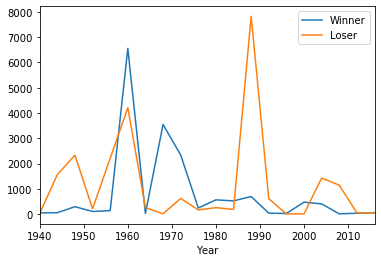

In [56]:
elections_and_names.query("Result == 'win'").set_index("Year")["Count"].plot()
elections_and_names.query("Result == 'loss'").sort_values("%").groupby("Year")['Count'].last().plot()
plt.legend(["Winner", "Loser"]);